
Demo to Raghu

----
Mnist Data
----


In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
from sklearn.preprocessing import StandardScaler

x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train_reshaped)
x_test_scaled = scaler.transform(x_test_reshaped)

print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"x_test_scaled shape: {x_test_scaled.shape}")

x_train_scaled shape: (60000, 784)
x_test_scaled shape: (10000, 784)


L2-reg Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(
    penalty='l2',
    C=1.0,          
    solver='lbfgs', 
    max_iter=1000,  
    random_state=42
)

In [41]:
model_lr.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [42]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model_lr.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9217
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [43]:
import numpy as np
coefficients_lr = model_lr.coef_ 
coef_abs_sum_lr = np.sum(np.abs(coefficients_lr), axis=0)  

In [ ]:
top_indices_lr = np.argsort(coef_abs_sum_lr)[::-1][:30]  
print(f"Feature Importance by abs-sum of coefficients (Descending): {top_indices_lr}")

# for i in top_indices:
#     print(f"Feature {i}, Coef Abs Sum: {coef_abs_sum[i]:.4f}")

Feature Importance by abs-sum of coefficients (Descending): [360  97 565 580 397 359 304 444 683 332 434 595 377 593 173 318 537 718
 554 323 411 248 145 357 510 572 516 609 374  68]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(random_state=42, max_depth=10)  

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8662
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.85      0.84      0.84      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.84      0.80      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.81      0.80       974
           9       0.81      0.86      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
from collections import deque

def get_top_splits(decision_tree, max_splits=30):

    tree = decision_tree.tree_
    split_features = []
    queue = deque([0])  

    while queue and len(split_features) < max_splits:
        node = queue.popleft()
        feature_index = tree.feature[node]
        
        if feature_index != -2:
            split_features.append(feature_index)
            
            left_child = tree.children_left[node]
            right_child = tree.children_right[node]
            
            if left_child != -1:  
                queue.append(left_child)
            if right_child != -1:
                queue.append(right_child)
                
    return split_features

top_30_features = get_top_splits(model, max_splits=30)
print("Top 30 split feature indices:", top_30_features)

Top 30 split feature indices: [350, 568, 489, 430, 435, 290, 234, 405, 211, 489, 346, 486, 297, 402, 658, 484, 516, 98, 156, 380, 320, 348, 655, 296, 656, 486, 598, 149, 103, 345]


Logistic Regression

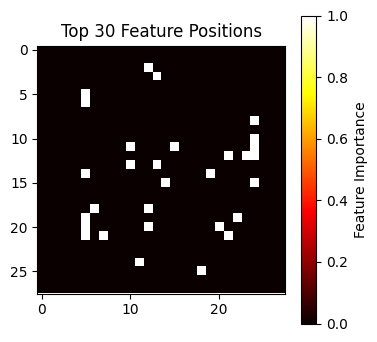

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_top_features(top_features, image_shape=(28, 28)):
    
    vis = np.zeros(image_shape)
    
    for feature in top_features:
        row = feature // image_shape[1]  
        col = feature % image_shape[1]   
        vis[row, col] = 1
    
    plt.figure(figsize=(4,4))
    plt.imshow(vis, cmap='hot', interpolation='nearest')
    plt.title("Top 30 Feature Positions")
    plt.colorbar(label="Feature Importance")
    plt.show()

visualize_top_features(top_indices_lr)

Decision tree 30 indices

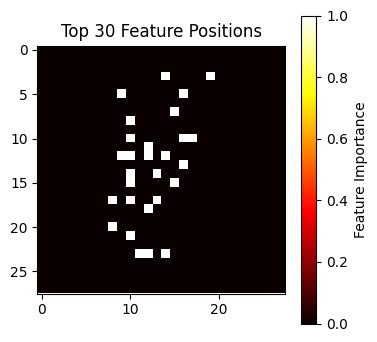

In [ ]:
def visualize_top_features(top_features, image_shape=(28, 28)):

    vis = np.zeros(image_shape)
    
    for feature in top_features:
        row = feature // image_shape[1]  
        col = feature % image_shape[1]   
        vis[row, col] = 1
    
    plt.figure(figsize=(4,4))
    plt.imshow(vis, cmap='hot', interpolation='nearest')
    plt.title("Top 30 Feature Positions")
    plt.colorbar(label="Feature Importance")
    plt.show()

visualize_top_features(top_30_features)

----------------------------------------
Spambase Data
-----------------------------------------

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
spambase = fetch_ucirepo(id=94) 
  
X = spambase.data.features 
y = spambase.data.targets 
  
print(spambase.metadata) 
print(spambase.variables) 

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [2]:
X.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3680, 57)
X_test shape: (921, 57)
y_train shape: (3680, 1)
y_test shape: (921, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled_spam = scaler.fit_transform(X_train)
x_test_scaled_spam = scaler.transform(X_test)

print(f"x_train_scaled shape: {x_train_scaled_spam.shape}")
print(f"x_test_scaled shape: {x_test_scaled_spam.shape}")

x_train_scaled shape: (3680, 57)
x_test_scaled shape: (921, 57)


In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(
    penalty='l2',
    C=1.0,          
    solver='lbfgs', 
    max_iter=1000,  
    random_state=42
)

In [6]:
model_lr.fit(x_train_scaled_spam, y_train)

/Users/hunjunsin/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

y_pred = model_lr.predict(x_test_scaled_spam)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"f1 score: {f1_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9197
f1 score: 0.9021164021164021
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



In [78]:
import numpy as np
coefficients_lr = model_lr.coef_ 
coef_abs_sum_lr = np.sum(np.abs(coefficients_lr), axis=0)  

In [ ]:
top_indices_lr = np.argsort(coef_abs_sum_lr)[::-1][:30]  
print(f"Feature Importance by abs-sum of coefficients (Descending): {top_indices_lr}")

feature_names = X.columns
for idx in top_indices_lr:
    print(f"Feature Index: {idx}, Column Name: {feature_names[idx]}, Coef Abs Sum: {coef_abs_sum_lr[idx]:.4f}")

Feature Importance by abs-sum of coefficients (Descending): [26 24 40 43 41 52 45 28 47 22 15 55  6 25  3 53 44 34 32 56 19 35 16 30
 14  4 38 29 48 20]
Feature Index: 26, Column Name: word_freq_george, Coef Abs Sum: 4.4952
Feature Index: 24, Column Name: word_freq_hp, Coef Abs Sum: 2.7971
Feature Index: 40, Column Name: word_freq_cs, Coef Abs Sum: 1.5503
Feature Index: 43, Column Name: word_freq_project, Coef Abs Sum: 1.4838
Feature Index: 41, Column Name: word_freq_meeting, Coef Abs Sum: 1.2535
Feature Index: 52, Column Name: char_freq_$, Coef Abs Sum: 1.2364
Feature Index: 45, Column Name: word_freq_edu, Coef Abs Sum: 1.1638
Feature Index: 28, Column Name: word_freq_lab, Coef Abs Sum: 1.0045
Feature Index: 47, Column Name: word_freq_conference, Coef Abs Sum: 1.0001
Feature Index: 22, Column Name: word_freq_000, Coef Abs Sum: 0.9784
Feature Index: 15, Column Name: word_freq_free, Coef Abs Sum: 0.8971
Feature Index: 55, Column Name: capital_run_length_longest, Coef Abs Sum: 0.8941
Fea

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

model_dt_spam = DecisionTreeClassifier(random_state=42, max_depth=10)  
model_dt_spam.fit(x_train_scaled_spam, y_train)

y_pred = model_dt_spam.predict(x_test_scaled_spam)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9261672095548317
f1_score: 0.9105263157894737
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       531
           1       0.94      0.89      0.91       390

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



In [ ]:
from collections import deque

def get_top_splits(decision_tree, max_splits=30):
    """
    학습된 DecisionTreeClassifier(decision_tree)에서
    루트부터 너비 우선 탐색을 통해 첫 max_splits 개의 분기에서 사용된 피처 인덱스를 추출합니다.
    """
    tree = decision_tree.tree_
    split_features = []
    queue = deque([0])  # root node index 0

    while queue and len(split_features) < max_splits:
        node = queue.popleft()
        feature_index = tree.feature[node]
        
        # feature_index == -2 -> leaf node
        if feature_index != -2:
            split_features.append(feature_index)
            
            left_child = tree.children_left[node]
            right_child = tree.children_right[node]
            
            if left_child != -1:  # no child
                queue.append(left_child)
            if right_child != -1:
                queue.append(right_child)
                
    return split_features

top_30_features = get_top_splits(model_dt_spam, max_splits=30)
print("Top 30 split feature indices:", top_30_features)

print("Top 30 split feature names:")
for idx in top_30_features:
    print(f"Feature Index: {idx}, Feature Name: {feature_names[idx]}")

Top 30 split feature indices: [52, 6, 24, 51, 26, 55, 6, 15, 54, 45, 6, 45, 5, 23, 24, 15, 34, 32, 17, 18, 26, 54, 54, 4, 55, 16, 51, 38, 9, 47]
Top 30 split feature names:
Feature Index: 52, Feature Name: char_freq_$
Feature Index: 6, Feature Name: word_freq_remove
Feature Index: 24, Feature Name: word_freq_hp
Feature Index: 51, Feature Name: char_freq_!
Feature Index: 26, Feature Name: word_freq_george
Feature Index: 55, Feature Name: capital_run_length_longest
Feature Index: 6, Feature Name: word_freq_remove
Feature Index: 15, Feature Name: word_freq_free
Feature Index: 54, Feature Name: capital_run_length_average
Feature Index: 45, Feature Name: word_freq_edu
Feature Index: 6, Feature Name: word_freq_remove
Feature Index: 45, Feature Name: word_freq_edu
Feature Index: 5, Feature Name: word_freq_over
Feature Index: 23, Feature Name: word_freq_money
Feature Index: 24, Feature Name: word_freq_hp
Feature Index: 15, Feature Name: word_freq_free
Feature Index: 34, Feature Name: word_freq

----
20 News data
----

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_csv = "/Users/hunjunsin/Desktop/Jun/Unsupervised/hw1/20news_train.csv"
test_csv = "/Users/hunjunsin/Desktop/Jun/Unsupervised/hw1/20news_test.csv"

train_data_news = pd.read_csv(train_csv)
test_data_news = pd.read_csv(test_csv)

news_data = pd.concat([train_data_news, test_data_news], ignore_index=True)

news_data = news_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"data number : {len(news_data)}")


data number : 18846


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

data_20 = news_data.dropna(subset = ['body']).reset_index(drop = True)
news_input = data_20['body'].reset_index(drop=True)
news_labels = data_20['label'].reset_index(drop=True)

vectorizer = TfidfVectorizer(
    max_features=10000, 
    lowercase=True, 
    stop_words="english", 
    max_df=0.8, 
    min_df=5
)
news_vectorize = vectorizer.fit_transform(news_input)

In [5]:
news_dense = news_vectorize.toarray()
print(news_dense.shape)
print(news_labels.shape)

(18817, 10000)
(18817,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(news_dense, news_labels, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (15053, 10000)
X_test shape: (3764, 10000)
y_train shape: (15053,)
y_test shape: (3764,)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled_20 = scaler.fit_transform(X_train)
x_test_scaled_20 = scaler.transform(X_test)

print(f"x_train_scaled shape: {x_train_scaled_20.shape}")
print(f"x_test_scaled shape: {x_test_scaled_20.shape}")

x_train_scaled shape: (15053, 10000)
x_test_scaled shape: (3764, 10000)


In [8]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['00' '000' '005' ... 'zv' 'zx' 'zz']


In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(
    penalty='l2',
    C=1.0,          
    solver='lbfgs', 
    max_iter=1000,  
    random_state=42
)

In [10]:
model_lr.fit(x_train_scaled_20, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model_lr.predict(x_test_scaled_20)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8650
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.85      0.89      0.87       149
           comp.graphics       0.76      0.80      0.78       200
 comp.os.ms-windows.misc       0.79      0.83      0.81       186
comp.sys.ibm.pc.hardware       0.77      0.77      0.77       217
   comp.sys.mac.hardware       0.81      0.81      0.81       190
          comp.windows.x       0.82      0.87      0.85       204
            misc.forsale       0.79      0.76      0.78       199
               rec.autos       0.89      0.87      0.88       186
         rec.motorcycles       0.95      0.91      0.93       207
      rec.sport.baseball       0.92      0.96      0.94       212
        rec.sport.hockey       0.95      0.92      0.93       190
               sci.crypt       0.97      0.91      0.94       196
         sci.electronics       0.81      0.81      0.81       198
                 sci.med       0.90

In [12]:
import numpy as np
coefficients_lr = model_lr.coef_ 
coef_abs_sum_lr = np.sum(np.abs(coefficients_lr), axis=0) 
 
top_indices_lr = np.argsort(coef_abs_sum_lr)[::-1][:30] 
print(f"Feature Importance by abs-sum of coefficients (Descending): {top_indices_lr}")

for idx in top_indices_lr:
    print(f"Feature Index: {idx}, Column Name: {feature_names[idx]}, Coef Abs Sum: {coef_abs_sum_lr[idx]:.4f}")

Feature Importance by abs-sum of coefficients (Descending): [8953 9769  333 8935 8087 5625 6053 1886 3141 4218 3137 6723 4354 1889
 1083 8419  848 1077 7916 2530 3778 3205 6017 6421 5863  677 2206 1523
 6202 6980]
Feature Index: 8953, Column Name: thanks, Coef Abs Sum: 1.6862
Feature Index: 9769, Column Name: windows, Coef Abs Sum: 1.2937
Feature Index: 333, Column Name: 2nd, Coef Abs Sum: 1.1731
Feature Index: 8935, Column Name: test, Coef Abs Sum: 1.1449
Feature Index: 8087, Column Name: send, Coef Abs Sum: 1.0629
Feature Index: 5625, Column Name: mac, Coef Abs Sum: 0.9607
Feature Index: 6053, Column Name: motif, Coef Abs Sum: 0.8358
Feature Index: 1886, Column Name: car, Coef Abs Sum: 0.8085
Feature Index: 3141, Column Name: does, Coef Abs Sum: 0.7656
Feature Index: 4218, Column Name: graphics, Coef Abs Sum: 0.7643
Feature Index: 3137, Column Name: dod, Coef Abs Sum: 0.7594
Feature Index: 6723, Column Name: pc, Coef Abs Sum: 0.7496
Feature Index: 4354, Column Name: hardware, Coef Ab

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

model_dt_20 = DecisionTreeClassifier(random_state=42, max_depth=10)  
model_dt_20.fit(x_train_scaled_20, y_train)

y_pred = model_dt_20.predict(x_test_scaled_20)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.2691285866099894
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       149
           comp.graphics       0.33      0.01      0.01       200
 comp.os.ms-windows.misc       0.64      0.54      0.58       186
comp.sys.ibm.pc.hardware       0.71      0.05      0.09       217
   comp.sys.mac.hardware       0.00      0.00      0.00       190
          comp.windows.x       0.87      0.06      0.12       204
            misc.forsale       0.61      0.36      0.45       199
               rec.autos       0.66      0.48      0.56       186
         rec.motorcycles       0.89      0.51      0.65       207
      rec.sport.baseball       0.81      0.30      0.43       212
        rec.sport.hockey       0.96      0.42      0.59       190
               sci.crypt       0.95      0.31      0.46       196
         sci.electronics       0.00      0.00      0.00       198
                 sci.me

/Users/hunjunsin/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hunjunsin/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hunjunsin/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

model_dt_20 = DecisionTreeClassifier(random_state=42, max_depth=30)  
model_dt_20.fit(x_train_scaled_20, y_train)

y_pred = model_dt_20.predict(x_test_scaled_20)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4670563230605739
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.62      0.22      0.33       149
           comp.graphics       0.70      0.26      0.37       200
 comp.os.ms-windows.misc       0.72      0.49      0.59       186
comp.sys.ibm.pc.hardware       0.64      0.23      0.33       217
   comp.sys.mac.hardware       0.63      0.46      0.53       190
          comp.windows.x       0.71      0.40      0.51       204
            misc.forsale       0.75      0.47      0.58       199
               rec.autos       0.73      0.57      0.64       186
         rec.motorcycles       0.90      0.65      0.75       207
      rec.sport.baseball       0.75      0.47      0.58       212
        rec.sport.hockey       0.83      0.63      0.72       190
               sci.crypt       0.92      0.55      0.69       196
         sci.electronics       0.10      0.87      0.19       198
                 sci.me

In [15]:
model_dt_1000 = DecisionTreeClassifier(random_state=42, max_depth=1000)  

model_dt_1000.fit(x_train_scaled_20, y_train)

y_pred = model_dt_1000.predict(x_test_scaled_20)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6123804463336876
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.58      0.58      0.58       149
           comp.graphics       0.48      0.47      0.48       200
 comp.os.ms-windows.misc       0.53      0.59      0.56       186
comp.sys.ibm.pc.hardware       0.55      0.44      0.49       217
   comp.sys.mac.hardware       0.56      0.58      0.57       190
          comp.windows.x       0.49      0.63      0.55       204
            misc.forsale       0.62      0.64      0.63       199
               rec.autos       0.58      0.68      0.63       186
         rec.motorcycles       0.81      0.72      0.76       207
      rec.sport.baseball       0.70      0.71      0.71       212
        rec.sport.hockey       0.76      0.75      0.76       190
               sci.crypt       0.77      0.73      0.75       196
         sci.electronics       0.45      0.44      0.45       198
                 sci.me

In [16]:
model_dt_3000 = DecisionTreeClassifier(random_state=42, max_depth=3000)  

# 모델 학습
model_dt_3000.fit(x_train_scaled_20, y_train)

y_pred = model_dt_3000.predict(x_test_scaled_20)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6123804463336876
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.58      0.58      0.58       149
           comp.graphics       0.48      0.47      0.48       200
 comp.os.ms-windows.misc       0.53      0.59      0.56       186
comp.sys.ibm.pc.hardware       0.55      0.44      0.49       217
   comp.sys.mac.hardware       0.56      0.58      0.57       190
          comp.windows.x       0.49      0.63      0.55       204
            misc.forsale       0.62      0.64      0.63       199
               rec.autos       0.58      0.68      0.63       186
         rec.motorcycles       0.81      0.72      0.76       207
      rec.sport.baseball       0.70      0.71      0.71       212
        rec.sport.hockey       0.76      0.75      0.76       190
               sci.crypt       0.77      0.73      0.75       196
         sci.electronics       0.45      0.44      0.45       198
                 sci.me

In [17]:
from collections import deque

def get_top_splits(decision_tree, max_splits=30):

    tree = decision_tree.tree_
    split_features = []
    queue = deque([0])  

    while queue and len(split_features) < max_splits:
        node = queue.popleft()
        feature_index = tree.feature[node]
        
        if feature_index != -2:
            split_features.append(feature_index)
            
            left_child = tree.children_left[node]
            right_child = tree.children_right[node]
            
            if left_child != -1:  
                queue.append(left_child)
            if right_child != -1:
                queue.append(right_child)
                
    return split_features


top_30_features = get_top_splits(model_dt_1000, max_splits=30)
print("Top 30 split feature indices:", top_30_features)

print("Top 30 split feature names:")
for idx in top_30_features:
    print(f"Feature Index: {idx}, Feature Name: {feature_names[idx]}")

Top 30 split feature indices: [3137, 9769, 4995, 4498, 6053, 1293, 3137, 2171, 6307, 7916, 3164, 6328, 7875, 2879, 6017, 967, 4183, 1523, 8944, 1600, 6160, 6278, 1886, 5142, 2237, 3661, 9903, 6348, 3164, 4186]
Top 30 split feature names:
Feature Index: 3137, Feature Name: dod
Feature Index: 9769, Feature Name: windows
Feature Index: 4995, Feature Name: isu
Feature Index: 4498, Feature Name: hockey
Feature Index: 6053, Feature Name: motif
Feature Index: 1293, Feature Name: auto
Feature Index: 3137, Feature Name: dod
Feature Index: 2171, Feature Name: clipper
Feature Index: 6307, Feature Name: noted
Feature Index: 7916, Feature Name: sale
Feature Index: 3164, Feature Name: dos
Feature Index: 6328, Feature Name: nsa
Feature Index: 7875, Feature Name: rutgers
Feature Index: 2879, Feature Name: delta
Feature Index: 6017, Feature Name: monitor
Feature Index: 967, Feature Name: alternative
Feature Index: 4183, Feature Name: gosh
Feature Index: 1523, Feature Name: bike
Feature Index: 8944, Fea